In [3]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pa
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

White noise (example)

In [4]:
white_noise = np.random.normal(0,1,size=1000)
white_noise

array([ 1.39935544e+00,  9.24633683e-01,  5.96303699e-02, -6.46936778e-01,
        6.98223314e-01,  3.93485385e-01,  8.95193220e-01,  6.35171802e-01,
        1.04955272e+00, -5.35235212e-01,  1.31739407e+00,  1.97599605e-01,
        2.07526087e+00, -6.89187818e-01,  1.73596380e+00,  1.97910783e-01,
       -6.51418004e-01, -4.83885834e-01, -3.20347308e-01,  4.24165946e-01,
        5.22835488e-01, -5.73700004e-01, -2.43545923e-02,  2.14227036e+00,
        1.72754317e+00,  4.36323670e-01,  3.80034782e-02,  1.20031327e-01,
        6.13517973e-01, -1.02279257e+00, -2.57376537e-01, -1.66858407e+00,
        3.99223123e-01,  6.47195940e-01, -4.83186462e-01,  1.57398676e+00,
       -1.22576566e+00, -1.46437488e+00,  2.24451819e-01,  1.04709830e+00,
        1.68392769e+00, -4.58884263e-01,  1.07868083e+00, -3.85084695e-02,
       -1.72627300e-01,  8.83659937e-01,  6.52322878e-01, -1.57639216e+00,
        1.47654035e+00,  1.38009135e+00, -6.25562702e-01,  3.95803533e-01,
        4.94030186e-01,  

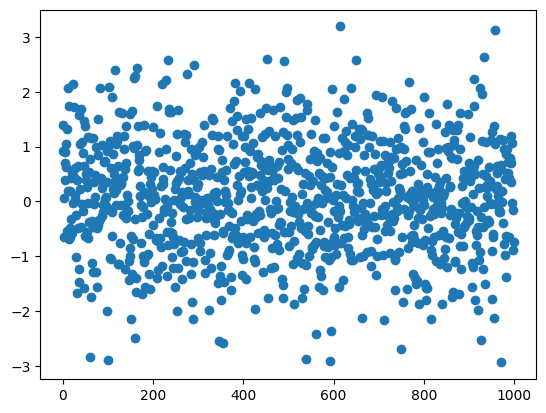

In [9]:
plot.scatter(x=list(range(0,1000)), y=white_noise)

In [13]:
correlation = np.corrcoef(white_noise[:-1],white_noise[1:])

In [14]:
correlation

array([[ 1.        , -0.01430359],
       [-0.01430359,  1.        ]])

Example of AR(1) and AR(2) models

In [27]:
coef_1 = 0.6
coef_2 = 0.4

In [29]:
X_0 = 10
X_1 = 11

In [30]:
n = 1000

white_noise = np.random.normal(0,1,n)

X_t = list()
X_t.append(X_0)
X_t.append(X_1)

for i in range(2,n):
    x_t = X_t[i-1] * coef_1 + X_t[i-2]*coef_2 + white_noise[i]
    X_t.append(x_t)

Xt_ts = pa.Series(X_t)

<AxesSubplot: >

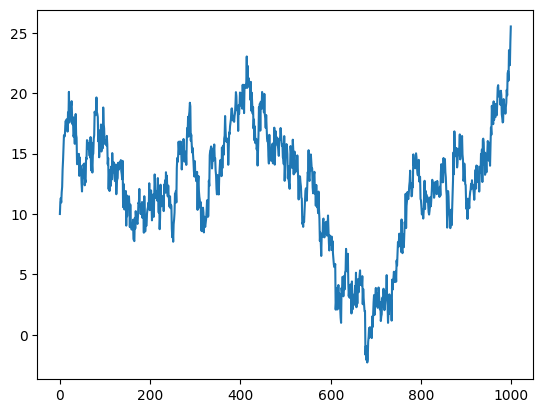

In [31]:
Xt_ts.plot()

Analysis of electricity production time series

<AxesSubplot: >

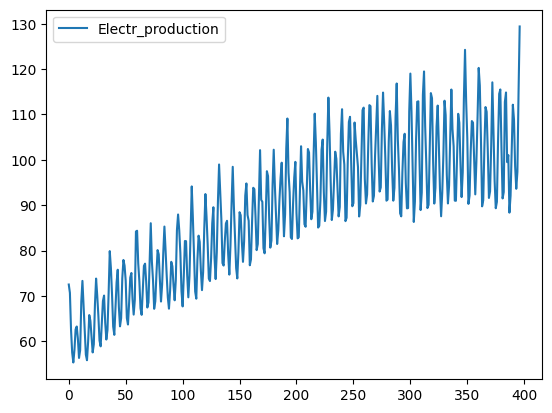

In [4]:
electricity_production_data = pa.read_csv('Electric_Production.csv')
electricity_production_data = electricity_production_data.rename(columns={'IPG2211A2N':'Electr_production'})
electricity_production_data.plot()

ACF function

<StemContainer object of 3 artists>

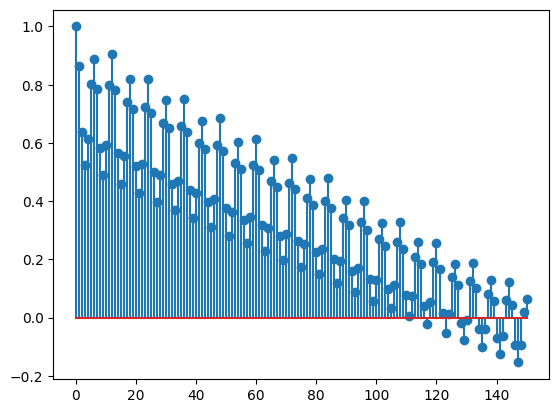

In [5]:
data = electricity_production_data['Electr_production']
acf = sm.tsa.stattools.acf(data,nlags=150)
plot.stem(range(0,len(acf)),acf)

Example of MA(1) and MA(2) models

<AxesSubplot: >

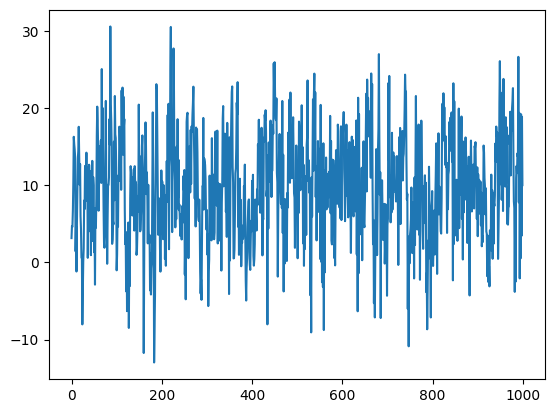

In [6]:
mu = 10
coef_1 = 0.8
coef_2 = 0.4

n = 1000

white_noise = np.random.normal(0,5,n+2)

X_t = list()

x_0 = mu + white_noise[0]*coef_1 + white_noise[1] * coef_2 + white_noise[2]

for i in range(0,n):
    x_t = mu + white_noise[i]*coef_1 + white_noise[i+1] * coef_2 + white_noise[i+2]
    X_t.append(x_t)

Xt_ts = pa.Series(X_t)
Xt_ts.plot()

Removing trend (substract rolling 6 months average from the data)

<AxesSubplot: >

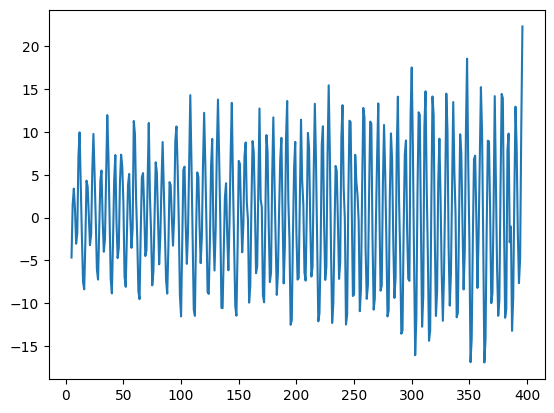

In [7]:
rolling_mean = data.rolling(window=6).mean()
data_no_trend = data - rolling_mean
data_no_trend.plot()

ACF (no trend)

<StemContainer object of 3 artists>

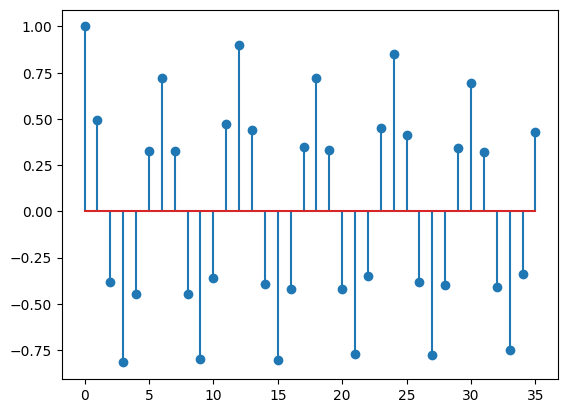

In [8]:
data_no_trend = data_no_trend[data_no_trend.notnull()]
acf = sm.tsa.stattools.acf(data_no_trend,nlags=35)
plot.stem(range(0,len(acf)),acf)

Remove seasonality

<AxesSubplot: >

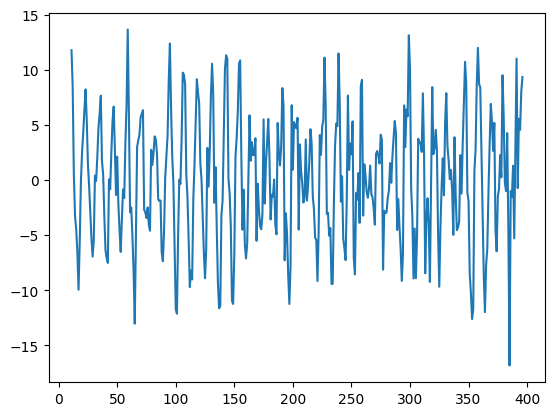

In [9]:
data_cleared = data_no_trend.diff(periods=6)
data_cleared = data_cleared[data_cleared.notnull()]
data_cleared.plot()

<StemContainer object of 3 artists>

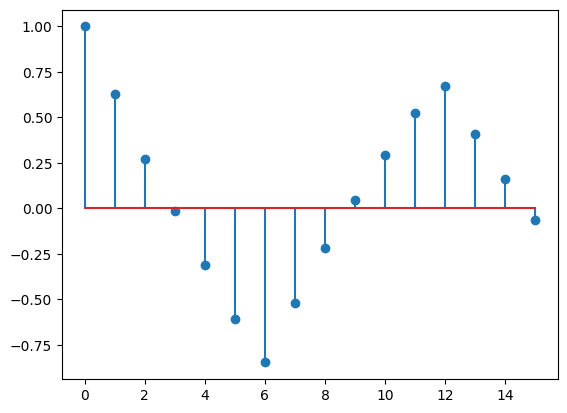

In [10]:
acf = sm.tsa.stattools.acf(data_cleared,nlags=15)
plot.stem(range(0,len(acf)),acf)

Try AR(2) model

In [11]:
model = sm.tsa.arima.ARIMA(data_cleared,order=(2,0,0)) #AR(2)
results = model.fit()
results.summary()

c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Electr_production   No. Observations:                  386
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1107.303
Date:                Thu, 13 Jul 2023   AIC                           2222.605
Time:                        18:32:05   BIC                           2238.429
Sample:                             0   HQIC                          2228.880
                                - 386                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1287      0.492      0.261      0.794      -0.836       1.094
ar.L1          0.7699      0.047     16.406      0.000       0.678       0.862
ar.L2         -0.2064      0.049     -4.198      0.000      -0.303      -0.110
sigma2        18.1353      1.443     12.567      0.000      15.307      20.964
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.44   Prob(JB):                         0.53
Heteroskedasticity (H):               1.66   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Do auto fit ARIMA(p,d,q) model - the program checks all and selects the one with smallest AIC value

In [12]:
model = auto_arima(data_cleared,trace=True,suppress_warnings=True)
results = model.fit(data_cleared)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2434.623, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2237.175, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2247.720, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2432.698, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2222.605, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2213.711, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2174.977, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2090.094, Time=0.14 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1997.567, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1995.638, Time=0.19 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2007.403, T

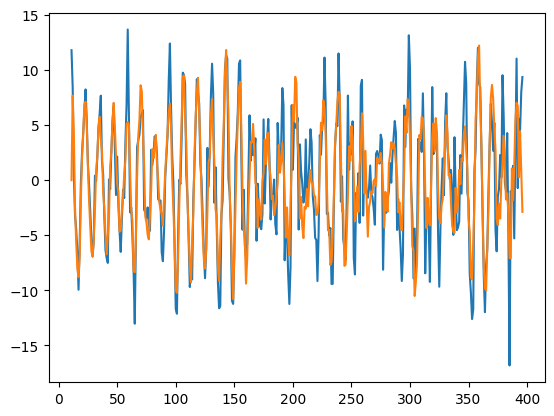

In [13]:
#ARMA(5,1)

plot.plot(data_cleared)
plot.plot(results.fittedvalues())

In [14]:
model = auto_arima(data,trace=True,suppress_warnings=True)
results = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=0.43 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.23 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=0.35 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

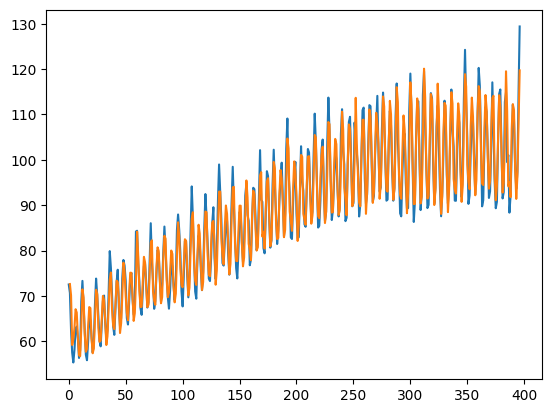

In [15]:
plot.plot(data)
fitted_vals = results.fittedvalues()
fitted_vals = fitted_vals[1:]
plot.plot(fitted_vals)

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1021.370
Date:                Thu, 13 Jul 2023   AIC                           2058.740
Time:                        18:33:28   BIC                           2090.591
Sample:                             0   HQIC                          2071.358
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1110      0.024      4.714      0.000       0.065       0.157
ar.L1          0.9986      0.002    507.449      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -753.305      0.000      -1.002      -0.997
ma.L1         -1.3644      0.038    -35.658      0.000      -1.439      -1.289
ma.L2          0.9236      0.071     12.931      0.000       0.784       1.064
ma.L3          0.0061      0.071      0.085      0.932      -0.134       0.146
ma.L4         -0.4326      0.042    -10.236      0.000      -0.515      -0.350
sigma2         9.8901      0.635     15.575      0.000       8.646      11.135
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):                22.01
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Check residuals

In [17]:
resid = results.resid()
resid = resid[1:]

<AxesSubplot: >

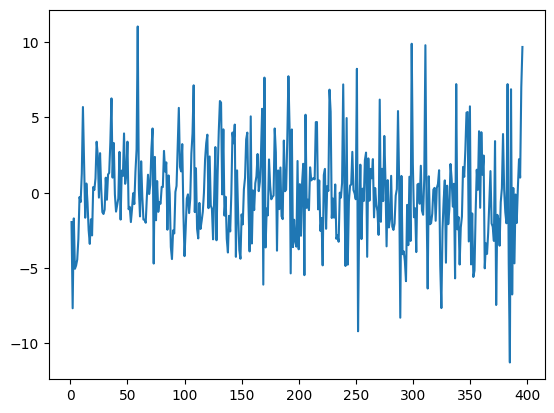

In [18]:
resid.plot()

In [19]:
correlation_matrix = np.corrcoef(resid[:-1],resid[1:])

C:\Users\dovil\AppData\Local\Temp\ipykernel_19028\2683749984.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  correlation_matrix = np.corrcoef(resid[:-1],resid[1:])


In [20]:
correlation_matrix

array([[1.        , 0.06296611],
       [0.06296611, 1.        ]])

# Do Dickey-Fauller test (check stationarity)
De-trended and de-seasonalized data: We can test that the resultant series is stationary using the Augmented Dickey-Fuller (ADF) test. The null hypothesis of this test is that the series is non-stationary. The statsmodels package provides a function for carrying out the ADF test:

In [21]:
test_results = adfuller(data_cleared)
print('ADF Statistic: ', test_results[0])
print('P-Value: ', test_results[1])

ADF Statistic:  -9.228641773335568
P-Value:  1.701931806143324e-15


<StemContainer object of 3 artists>

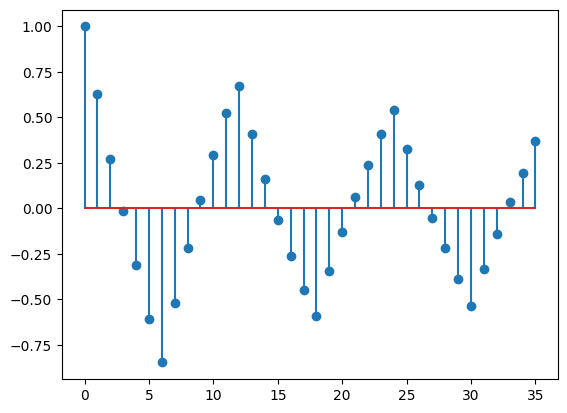

In [22]:
acf = sm.tsa.stattools.acf(data_cleared,nlags=35)
plot.stem(range(0,len(acf)),acf)

Show all the main plots for main data

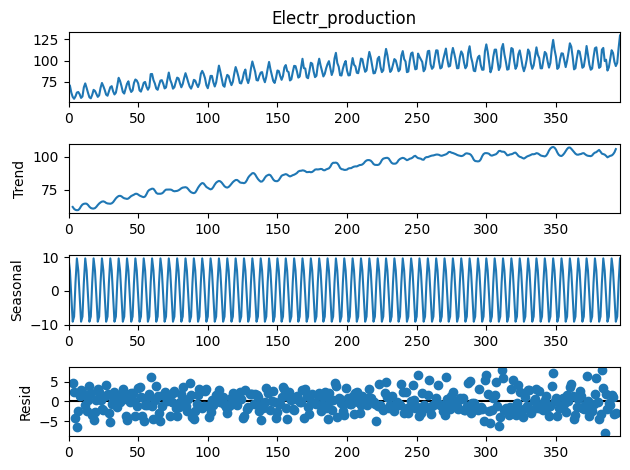

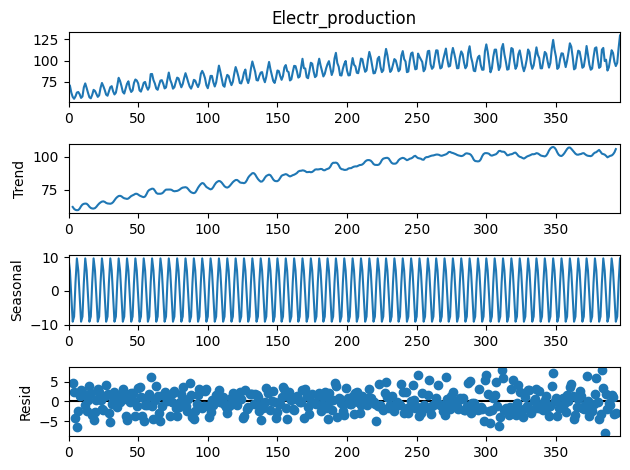

In [23]:
decomoposition = seasonal_decompose(data,period=6)
decomoposition.plot()